# Analysis after Selection and New Category Classification

Every  **Complain** is classified into a **Subject** and a **Subdivision** within that subject. We selected only relevant **Subdivisions** and grouped them into new **Categories**.

### New categories created (7):

- Traffic Improvement Requests
- Traffic Problems
- Street Blocking
- Parking Infraction
- Health Issues
- Noise Problems
- Citizen Safety

Total number of selected complains: **3616/5499**.

## Number of Complains per Cluster

It didn't change very much after the selection. C, D and E are still the ones with most complains

In [1]:
# -*- coding: utf-8 -*-
execfile("includes.py")
%matplotlib inline

#init() #configure the size of figures

df=sqlDataFrame("SELECT * FROM gbeer_buffer_complains WHERE new_category is not NULL")

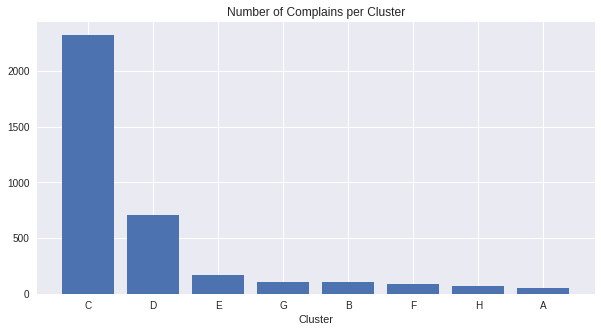

In [2]:
teste=df.grupo.tolist()
tokendict={}
for ut in teste:
    tokendict[ut]=teste.count(ut)

L=sorted(tokendict.iteritems(), key= lambda (k,v):v, reverse=True)

topfreq=L[:20]
pos = np.arange(len(topfreq))
plt.figure(figsize=(10,5))
plt.bar(pos, [e[1] for e in topfreq]);
plt.xticks(pos, [e[0] for e in topfreq])
plt.title('Number of Complains per Cluster')
plt.xlabel('Cluster')
plt.show()

## Top Categories per Cluster

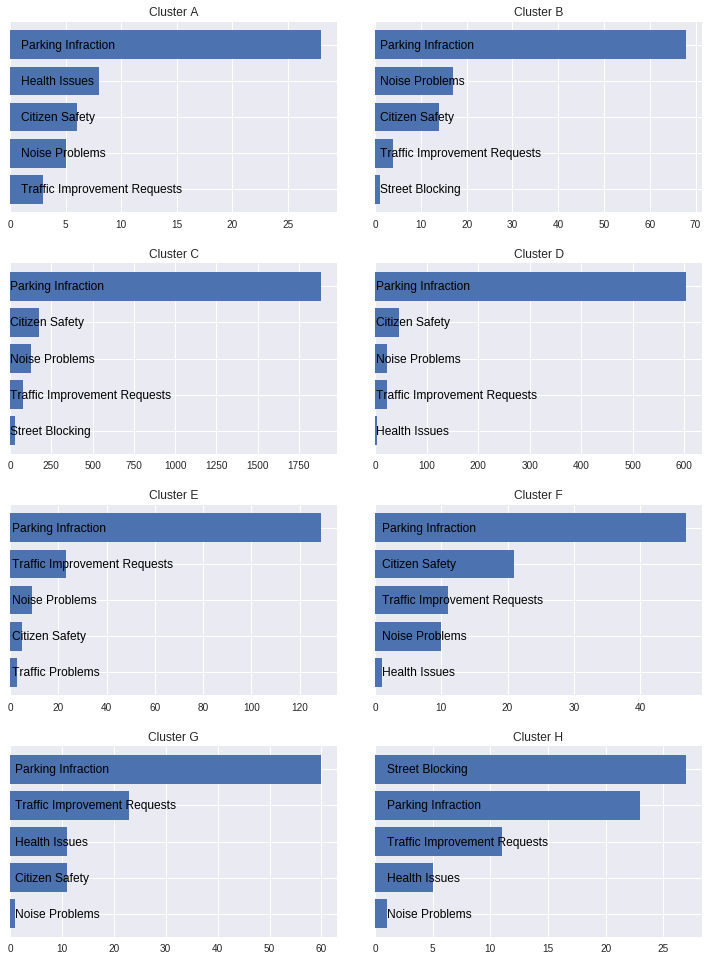

In [3]:
df3 = sqlDataFrame("""SELECT grupo, new_category, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category is not NULL
    GROUP BY grupo, new_category
    order by grupo, num DESC""")

#select the top 5 of each group
df3 = df3.groupby("grupo").head(5)

w=2 #width of subplot
h=4 #height of subplot

#criates a grid with 
fig, axarr = plt.subplots(h, w, figsize=(10,13))
fig.tight_layout(pad=0, w_pad=1, h_pad=3)

pos= np.arange(5)

grupos = df3["grupo"].unique()

for i in np.arange(h):
    for j in np.arange(w):        
        grupo = grupos[((i*2) + j)]
        grupo_df = df3[df3["grupo"] == "%s" % grupo]
        axarr[i, j].set_title('Cluster %s' % grupo)
        axarr[i, j].barh(pos, grupo_df.num)
        axarr[i, j].set_yticklabels([])
        axarr[i, j].invert_yaxis()
        #axarr[i, j].set_xlim([0, 2000])
        for k in pos:
            axarr[i,j].annotate(grupo_df.new_category.iloc[k], (1,(pos[k])+0.1), color="black", size=12)

plt.show()

## Number of Complains per Day of the Week

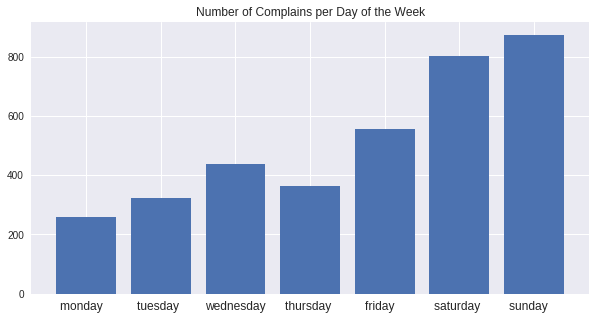

In [4]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT day_of_week, day_of_week2, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category IS NOT NULL
    GROUP BY day_of_week, day_of_week2
    ORDER BY day_of_week;""")

#sort the values ascending to invert the bars


# plot bar
pos = np.arange(len(df2))
plt.figure(figsize=(10,5))
plt.bar(pos, df2.num)
plt.xticks(pos, df2.day_of_week2, size=12); # plot subject names on y
plt.title("Number of Complains per Day of the Week")
plt.show()

## Number of Complains per Hour of the Day

In [3]:
df2 = sqlDataFrame("""SELECT hora, day_of_week
    FROM gbeer_buffer_complains
    WHERE new_category is not NULL""")

alldays = df2
alldays = alldays.assign(ones = 1) #creates a new column and assign one to all values
alldays = alldays[['hora', 'ones']] #select only these two columns
alldays_grp = alldays.groupby("hora", as_index=False).agg("sum") #group by hour
alldays_grp = alldays_grp.sort_values(by="hora", ascending=True) #sort by hour

weekday = df2[df2['day_of_week'].isin([1,2,3,4])] #select weekdays
weekday = weekday.assign(ones = 1) #creates a new column and assign one to all values
weekday = weekday[['hora', 'ones']] #select only these two columns
weekday_grp = weekday.groupby("hora", as_index=False).agg("sum") #group by hour
weekday_grp = weekday_grp.sort_values(by="hora", ascending=True) #sort by hour

weekend = df2[df2['day_of_week'].isin([5,6,7])] #select weekends
weekend = weekend.assign(ones = 1)
weekend = weekend[['hora', 'ones']]
weekend_grp = weekend.groupby("hora", as_index=False).agg("sum")
weekend_grp = weekend_grp.sort_values(by="hora", ascending=True)

#creates a grid for graphs
fig, axarr = plt.subplots(3, 1, figsize=(10.2,10))
fig.tight_layout(pad=0, w_pad=0, h_pad=3)

x = np.array(alldays_grp.hora) #create an array of labels
pos= np.arange(len(alldays_grp))
axarr[0].set_title('All days')
axarr[0].bar(pos, alldays_grp.ones)
axarr[0].set_xticks(pos)
axarr[0].set_xticklabels(x)
axarr[0].set_ylabel('Number of Complains')

x = np.array(weekday_grp.hora) #create an array of labels
pos= np.arange(len(weekday_grp))
axarr[1].set_title('Weekdays')
axarr[1].bar(pos, weekday_grp.ones)
axarr[1].set_xticks(pos)
axarr[1].set_xticklabels(x)
axarr[1].set_ylabel('Number of Complains')

x = np.array(weekend_grp.hora)
pos= np.arange(len(weekend_grp))
axarr[2].set_title('Weekends')
axarr[2].bar(pos, weekend_grp.ones)
axarr[2].set_ylabel('Number of Complains')
axarr[2].set_xticks(pos)
axarr[2].set_xticklabels(x)


plt.show()

NameError: name 'sqlDataFrame' is not defined

## Number of Complains per Categories

- Weekdays: Monday to Thursday

- Weekends: Friday, Saturday and Sunday

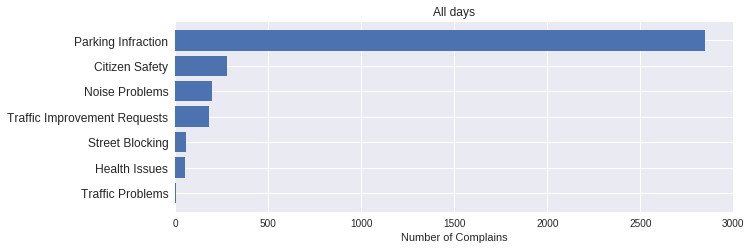

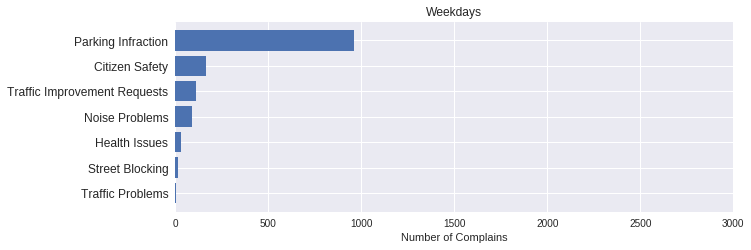

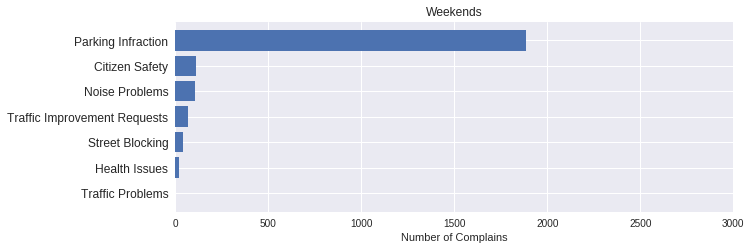

In [6]:
df2 = sqlDataFrame("""SELECT new_category, day_of_week
    FROM gbeer_buffer_complains
    WHERE new_category is not NULL""")

#All Days
alldays = df2
alldays = alldays.assign(ones = 1)
alldays = alldays[['new_category', 'ones']]
alldays_grp = alldays.groupby("new_category", as_index=False).agg("sum")
alldays_grp = alldays_grp.sort_values(by="ones", ascending=True)

pos = np.arange(len(alldays_grp))
plt.figure(figsize=(10,3.5))
plt.barh(pos, alldays_grp.ones)
plt.yticks(pos, alldays_grp.new_category, size=12); # plot subject names on y
plt.title("All days")
plt.xlabel("Number of Complains")
plt.xlim([0, 3000])
plt.show()

#Weekday
weekday = df2[df2['day_of_week'].isin([1,2,3,4])]
weekday = weekday.assign(ones = 1)
weekday = weekday[['new_category', 'ones']]
weekday_grp = weekday.groupby("new_category", as_index=False).agg("sum")
weekday_grp=weekday_grp.sort_values(by="ones", ascending=True)

pos= np.arange(len(weekday_grp))
plt.figure(figsize=(10,3.5))
plt.barh(pos, weekday_grp.ones)
plt.title('Weekdays')
plt.yticks(pos, weekday_grp.new_category, size=12); # plot subject names on y
plt.xlabel('Number of Complains')
plt.xlim([0, 3000])
plt.show()

#Weekend
weekend = df2[df2['day_of_week'].isin([5,6,7])]
weekend = weekend.assign(ones = 1)
weekend = weekend[['new_category', 'ones']]
weekend_grp = weekend.groupby("new_category", as_index=False).agg("sum")
weekend_grp=weekend_grp.sort_values(by="ones", ascending=True)

pos= np.arange(len(weekend_grp))
plt.figure(figsize=(10,3.5))
plt.barh(pos, weekend_grp.ones)
plt.title('Weekends')
plt.yticks(pos, weekend_grp.new_category, size=12); # plot subject names on y
plt.xlabel('Number of Complains')
plt.xlim([0, 3000])
plt.show()

## Top Subdivisions per Category

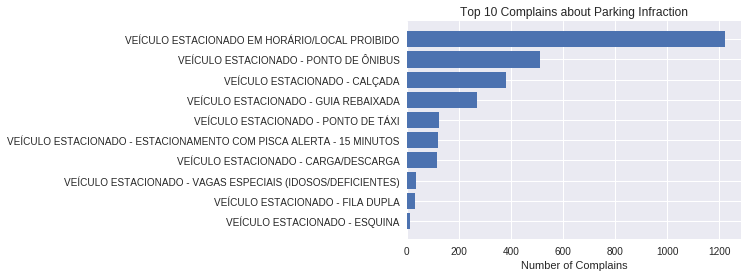

In [7]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT subdivisao, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category = 'Parking Infraction'
    GROUP BY subdivisao
    ORDER by num DESC LIMIT %s""", 10)

#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.subdivisao); # plot subject names on y
plt.title("Top 10 Complains about Parking Infraction")
plt.xlabel("Number of Complains")
plt.show()

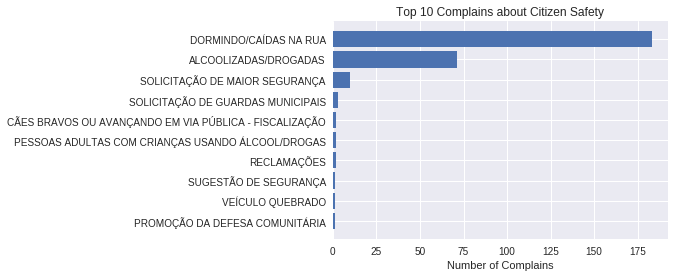

In [8]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT subdivisao, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category = 'Citizen Safety'
    GROUP BY subdivisao
    ORDER by num DESC LIMIT %s""", 10)

#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.subdivisao); # plot subject names on y
plt.title("Top 10 Complains about Citizen Safety")
plt.xlabel("Number of Complains")
plt.show()

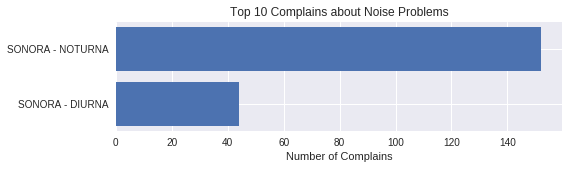

In [9]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT subdivisao, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category = 'Noise Problems'
    GROUP BY subdivisao
    ORDER by num DESC LIMIT %s""", 10)

#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.figure(figsize=(8,2))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.subdivisao); # plot subject names on y
plt.title("Top 10 Complains about Noise Problems")
plt.xlabel("Number of Complains")
plt.show()

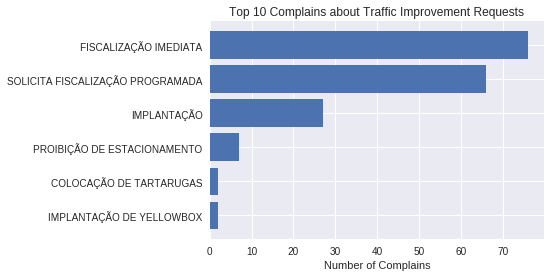

In [10]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT subdivisao, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category = 'Traffic Improvement Requests'
    GROUP BY subdivisao
    ORDER by num DESC LIMIT %s""", 10)

#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.subdivisao); # plot subject names on y
plt.title("Top 10 Complains about Traffic Improvement Requests")
plt.xlabel("Number of Complains")
plt.show()

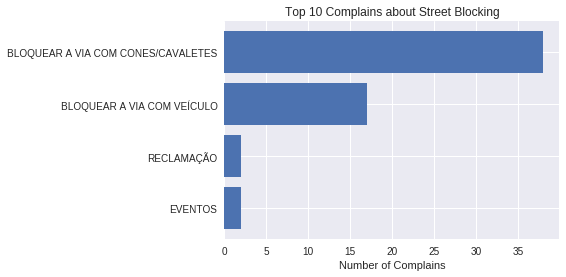

In [11]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT subdivisao, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category = 'Street Blocking'
    GROUP BY subdivisao
    ORDER by num DESC LIMIT %s""", 10)

#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.subdivisao); # plot subject names on y
plt.title("Top 10 Complains about Street Blocking")
plt.xlabel("Number of Complains")
plt.show()

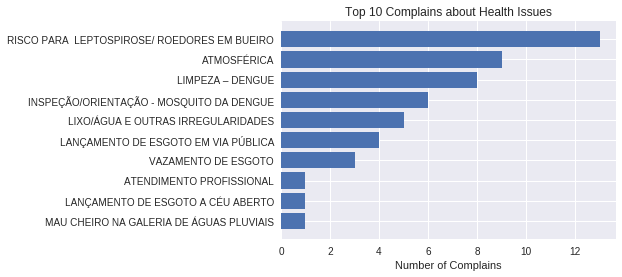

In [12]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT subdivisao, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category = 'Health Issues'
    GROUP BY subdivisao
    ORDER by num DESC LIMIT %s""", 10)

#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.subdivisao); # plot subject names on y
plt.title("Top 10 Complains about Health Issues")
plt.xlabel("Number of Complains")
plt.show()

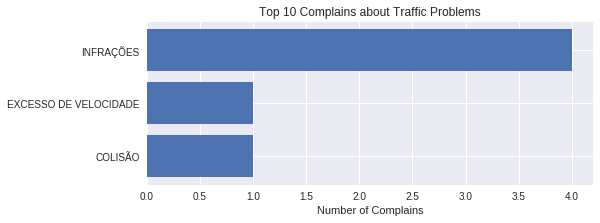

In [13]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT subdivisao, count(*) as num
    FROM gbeer_buffer_complains
    WHERE new_category = 'Traffic Problems'
    GROUP BY subdivisao
    ORDER by num DESC LIMIT %s""", 10)

#sort the values ascending to invert the bars
sub_sorted = df2.sort_values("num", ascending=True)

# plot bar
pos = np.arange(len(sub_sorted))
plt.figure(figsize=(8,3))
plt.barh(pos, sub_sorted.num)
plt.yticks(pos, sub_sorted.subdivisao); # plot subject names on y
plt.title("Top 10 Complains about Traffic Problems")
plt.xlabel("Number of Complains")
plt.show()

## Most Popular Hours for Categories

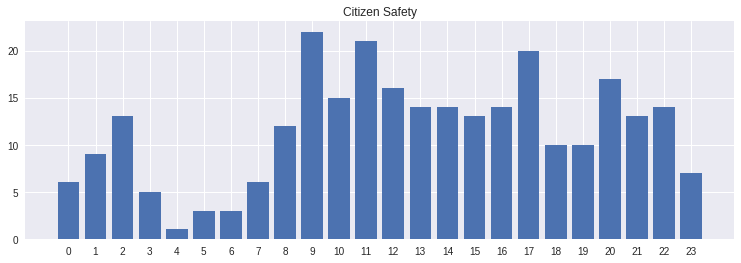

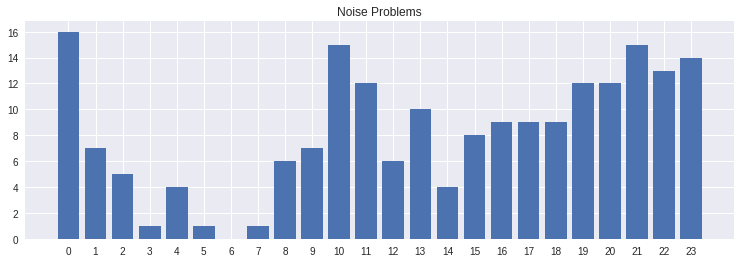

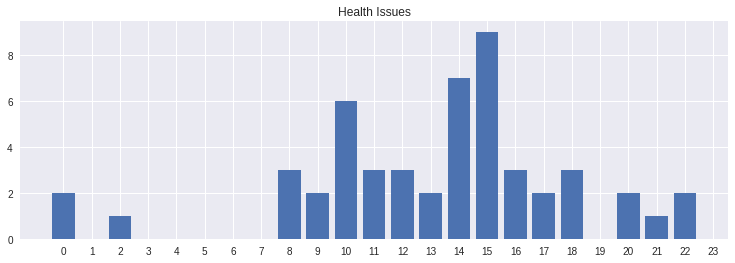

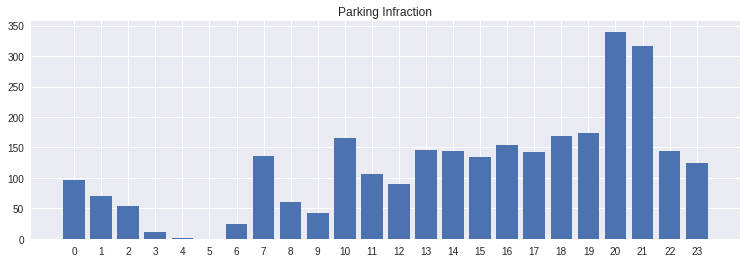

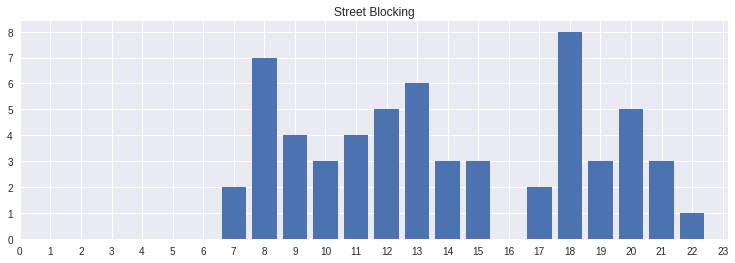

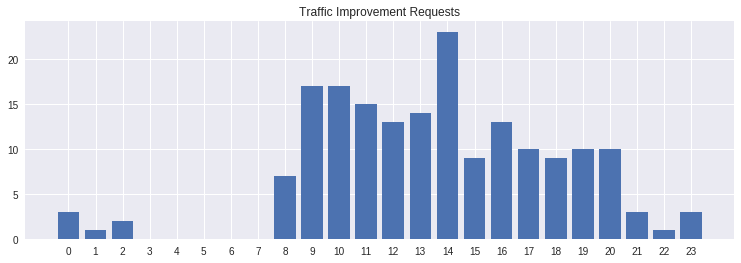

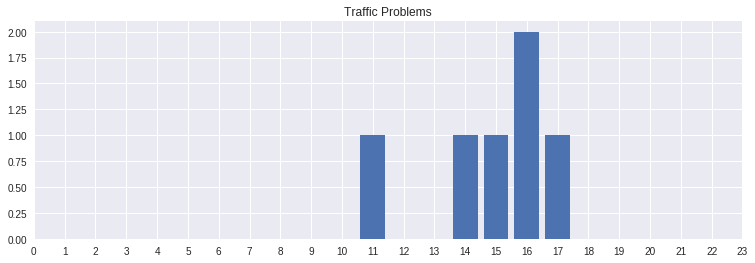

In [14]:
#select the top 10 complains from db
df2 = sqlDataFrame("""SELECT new_category, hora
    FROM gbeer_buffer_complains
    WHERE new_category is not NULL;""")

horas =  df2["hora"].sort_values().unique()

#Citizen Safety
safety = df2[df2['new_category'].isin(['Citizen Safety'])]
safety = safety.assign(ones = 1)
safety = safety[['hora', 'ones']]
safety_grp = safety.groupby("hora", as_index=False).agg("sum")
safety_grp=safety_grp.sort_values(by="hora", ascending=True)

plt.figure(figsize=(12.7,4))
plt.bar(horas, safety_grp.ones)
plt.xticks(horas); # plot subject names on y
plt.title("Citizen Safety")
plt.show()

#Noise Problems
noise = df2[df2['new_category'].isin(['Noise Problems'])]
noise = noise.assign(ones = 1)
noise = noise[['hora', 'ones']]
noise_grp = noise.groupby("hora", as_index=False).agg("sum")
noise_grp=noise_grp.sort_values(by="hora", ascending=True)
noise_horas =  noise_grp["hora"].sort_values().unique() #not every hour has a noise complain

plt.figure(figsize=(12.7,4))
plt.bar(noise_horas, noise_grp.ones)
plt.xticks(horas); # plot subject names on y
plt.title("Noise Problems")
plt.show()

#Health Issues
health = df2[df2['new_category'].isin(['Health Issues'])]
health = health.assign(ones = 1)
health = health[['hora', 'ones']]
health_grp = health.groupby("hora", as_index=False).agg("sum")
health_grp = health_grp.sort_values(by="hora", ascending=True)
health_horas = health_grp["hora"].sort_values().unique() #not every hour has a noise complain

plt.figure(figsize=(12.7,4))
plt.bar(health_horas, health_grp.ones)
plt.xticks(horas); # plot subject names on y
plt.title("Health Issues")
plt.show()

#Parking Infractions
parking = df2[df2['new_category'].isin(['Parking Infraction'])]
parking = parking.assign(ones = 1)
parking = parking[['hora', 'ones']]
parking_grp = parking.groupby("hora", as_index=False).agg("sum")
parking_grp = parking_grp.sort_values(by="hora", ascending=True)
parking_horas = parking_grp["hora"].sort_values().unique() #not every hour has a noise complain

plt.figure(figsize=(12.7,4))
plt.bar(parking_horas, parking_grp.ones)
plt.xticks(horas); # plot subject names on y
plt.title("Parking Infraction")
plt.show()

#Street Blocking
street = df2[df2['new_category'].isin(['Street Blocking'])]
street = street.assign(ones = 1)
street = street[['hora', 'ones']]
street_grp = street.groupby("hora", as_index=False).agg("sum")
street_grp = street_grp.sort_values(by="hora", ascending=True)
street_horas = street_grp["hora"].sort_values().unique() #not every hour has a noise complain

plt.figure(figsize=(12.7,4))
plt.bar(street_horas, street_grp.ones)
plt.xticks(horas); # plot subject names on y
plt.title("Street Blocking")
plt.show()

#Traffic Improvement Requests
traffic = df2[df2['new_category'].isin(['Traffic Improvement Requests'])]
traffic = traffic.assign(ones = 1)
traffic = traffic[['hora', 'ones']]
traffic_grp = traffic.groupby("hora", as_index=False).agg("sum")
traffic_grp = traffic_grp.sort_values(by="hora", ascending=True)
traffic_horas = traffic_grp["hora"].sort_values().unique() #not every hour has a noise complain

plt.figure(figsize=(12.7,4))
plt.bar(traffic_horas, traffic_grp.ones)
plt.xticks(horas); # plot subject names on y
plt.title("Traffic Improvement Requests")
plt.show()

#Traffic Problems
traffic2 = df2[df2['new_category'].isin(['Traffic Problems'])]
traffic2 = traffic2.assign(ones = 1)
traffic2 = traffic2[['hora', 'ones']]
traffic2_grp = traffic2.groupby("hora", as_index=False).agg("sum")
traffic2_grp = traffic2_grp.sort_values(by="hora", ascending=True)
traffic2_horas = traffic2_grp["hora"].sort_values().unique() #not every hour has a noise complain

plt.figure(figsize=(12.7,4))
plt.bar(traffic2_horas, traffic2_grp.ones)
plt.xticks(horas); # plot subject names on y
plt.title("Traffic Problems")
plt.show()